### Chain

In [1]:
import numpy as np
prob_swap_sweep_size = 100+1
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
time_cutoff_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

results = np.load('FOLDER_LOCATION/Infinite networks/Infinite chain/sweep_prob_swap_time_cutoff/Extended run/results_test.npy')
results_probswap = np.load('FOLDER_LOCATION/Infinite networks/Infinite chain/sweep_prob_swap_time_cutoff/Extended run probswap/results_test.npy')

virtual_node_degree_mean_kp2 = [results[i*len(prob_swap_range)+j][0] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_mean_kp2 = [results[i*len(prob_swap_range)+j][2] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_mean_kp2 = np.reshape(virtual_node_degree_mean_kp2, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_mean_kp2 = np.reshape(virtual_neighbourhood_size_mean_kp2, (len(time_cutoff_range), len(prob_swap_range)))

virtual_node_degree_mean_kp2_probswap = [results_probswap[i*len(prob_swap_range)+j][0] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_mean_kp2_probswap = [results_probswap[i*len(prob_swap_range)+j][2] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_mean_kp2_probswap = np.reshape(virtual_node_degree_mean_kp2_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_mean_kp2_probswap = np.reshape(virtual_neighbourhood_size_mean_kp2_probswap, (len(time_cutoff_range), len(prob_swap_range)))

In [6]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

In [3]:
V_max = np.empty(15)
V_max_probswap = np.empty(15)

for i in range(np.shape(virtual_neighbourhood_size_mean_kp2)[0]):
    V_max[i] = np.max(virtual_neighbourhood_size_mean_kp2[i, :])
    V_max_probswap[i] = np.max(virtual_neighbourhood_size_mean_kp2_probswap[i, :])

In [4]:
T2 = [14, 28, 42, 56,70]
F_gen = [0.9, 0.925, 0.95, 0.975, 1]
V_max_array = [[V_max[0], V_max[1], V_max[2], V_max[3], V_max[4]],
               [V_max[0], V_max[2], V_max[3], V_max[5], V_max[7]],
               [V_max[1], V_max[3], V_max[5], V_max[7], V_max[9]],
               [V_max[1], V_max[4], V_max[6], V_max[9], V_max[12]],
               [V_max[2], V_max[5], V_max[8], V_max[11], V_max[14]]
              ]

V_max_array_probswap = [[V_max_probswap[0], V_max_probswap[1], V_max_probswap[2], V_max_probswap[3], V_max_probswap[4]],
                        [V_max_probswap[0], V_max_probswap[2], V_max_probswap[3], V_max_probswap[5], V_max_probswap[7]],
                        [V_max_probswap[1], V_max_probswap[3], V_max_probswap[5], V_max_probswap[7], V_max_probswap[9]],
                        [V_max_probswap[1], V_max_probswap[4], V_max_probswap[6], V_max_probswap[9], V_max_probswap[12]],
                        [V_max_probswap[2], V_max_probswap[5], V_max_probswap[8], V_max_probswap[11], V_max_probswap[14]]
                       ]

In [7]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

color_virtual_neighbourhood_size = '#EB7246'
lightness_control_V = 0.1/2

colours = ListedColormap([adjust_lightness(color_virtual_neighbourhood_size, 1.6-lightness_control_V*i) for i in range(14)])


In [18]:
np.max(V_max_array)

5.084106866052704

Text(70, 1, '5.1')

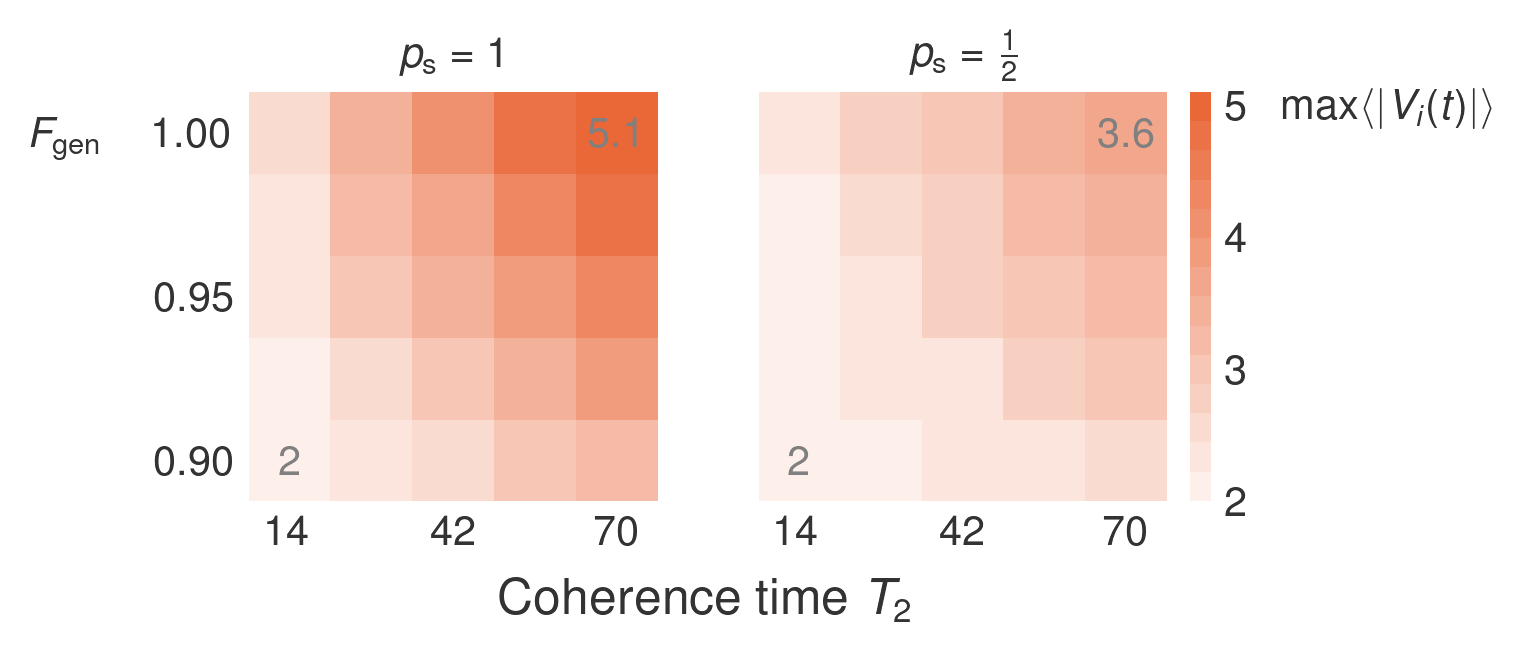

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')


mm = 1/25.4
outward = 2
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
ligthness_control_k = 0.45
lightness_control_V = 0.15

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=[(157.5)*mm/5*4, 157.5*mm/3], sharex='col', sharey='row')

ax[0].pcolor(T2, F_gen, V_max_array, cmap = colours, vmin = 2, vmax = 5.1)

ax[0].tick_params(axis='both', which='both', direction='out', size = 0)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xticks([14, 42, 70])
ax[0].set_xticks([28, 56], minor=True)
ax[0].set_yticks([0.9, 0.95, 1])
ax[0].set_yticks([0.925, 0.975], minor=True)

ax[0].set_ylabel(r'$F_{\mathrm{gen}}$', rotation=0, y=0.835, labelpad = 12, ha='right')

ax[0].set_aspect(560)
ax[0].set_title(r'$p_{\mathrm{s}}=1$', color=color_text)

pcolor_plot = ax[1].pcolor(T2, F_gen, V_max_array_probswap, cmap = colours, vmin = 2, vmax = 5.1)

ax[1].tick_params(axis='both', which='both', direction='out', size = 0)

ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xticks([14, 42, 70])
ax[1].set_xticks([28, 56], minor=True)
ax[1].set_yticks([0.9, 0.95, 1])
ax[1].set_yticks([0.925, 0.975], minor=True)

ax[1].set_aspect(560)
ax[1].set_title(r'$p_{\mathrm{s}}=\frac{1}{2}$', color=color_text)

fig.supxlabel(r'Coherence time $T_2$', x=0.46,  color=color_text)

cbar = fig.colorbar(pcolor_plot, drawedges=False, ticks = [2, 3, 4, 5])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0)
cbar.set_label(r'$\max \langle |V_i(t)| \rangle$', labelpad=8, rotation=0, ha='left', y=1.01, color=color_text)

ax[1].text(14, 0.9, r'2' , ha='center', va='center_baseline', color='gray', fontsize=10)
ax[1].text(70, 1, r'3.6' , ha='center', va='center_baseline', color='gray', fontsize=10)

ax[0].text(14, 0.9, r'2' , ha='center', va='center_baseline', color='gray', fontsize=10)
ax[0].text(70, 1, r'5.1' , ha='center', va='center_baseline', color='gray', fontsize=10)

# fig.savefig('FOLDER_LOCATION/infinite_chain/sweep_max_V_tcut.pdf', bbox_inches = 'tight', pad_inches=0*mm)

### Square

In [1]:
import numpy as np
prob_swap_sweep_size = 100+1
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
time_cutoff_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

results = np.load('FOLDER_LOCATION/Infinite networks/Infinite square/sweep_prob_swap_time_cutoff/Extended run/results.npy')
results_probswap = np.load('FOLDER_LOCATION/Infinite networks/Infinite square/sweep_prob_swap_time_cutoff/Extended run p_s = 0.5/results.npy')

virtual_node_degree_mean_kp4 = [results[i*len(prob_swap_range)+j][0] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_mean_kp4 = [results[i*len(prob_swap_range)+j][2] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_mean_kp4 = np.reshape(virtual_node_degree_mean_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_mean_kp4 = np.reshape(virtual_neighbourhood_size_mean_kp4, (len(time_cutoff_range), len(prob_swap_range)))

virtual_node_degree_mean_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][0] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_mean_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][2] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_mean_kp4_probswap = np.reshape(virtual_node_degree_mean_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_mean_kp4_probswap = np.reshape(virtual_neighbourhood_size_mean_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))

virtual_node_degree_10pct_kp4 = [results[i*len(prob_swap_range)+j][5] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_25pct_kp4 = [results[i*len(prob_swap_range)+j][6] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_50pct_kp4 = [results[i*len(prob_swap_range)+j][7] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_75pct_kp4 = [results[i*len(prob_swap_range)+j][8] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_90pct_kp4 = [results[i*len(prob_swap_range)+j][9] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_10pct_kp4 = [results[i*len(prob_swap_range)+j][12] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_25pct_kp4 = [results[i*len(prob_swap_range)+j][13] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_50pct_kp4 = [results[i*len(prob_swap_range)+j][14] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_75pct_kp4 = [results[i*len(prob_swap_range)+j][15] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_90pct_kp4 = [results[i*len(prob_swap_range)+j][16] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_10pct_kp4 = np.reshape(virtual_node_degree_10pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_25pct_kp4 = np.reshape(virtual_node_degree_25pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_50pct_kp4 = np.reshape(virtual_node_degree_50pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_75pct_kp4 = np.reshape(virtual_node_degree_75pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_90pct_kp4 = np.reshape(virtual_node_degree_90pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_10pct_kp4 = np.reshape(virtual_neighbourhood_size_10pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_25pct_kp4 = np.reshape(virtual_neighbourhood_size_25pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_50pct_kp4 = np.reshape(virtual_neighbourhood_size_50pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_75pct_kp4 = np.reshape(virtual_neighbourhood_size_75pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_90pct_kp4 = np.reshape(virtual_neighbourhood_size_90pct_kp4, (len(time_cutoff_range), len(prob_swap_range)))

virtual_node_degree_10pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][5] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_25pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][6] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_50pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][7] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_75pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][8] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_node_degree_90pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][9] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_10pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][12] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_25pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][13] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_50pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][14] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_75pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][15] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]
virtual_neighbourhood_size_90pct_kp4_probswap = [results_probswap[i*len(prob_swap_range)+j][16] for i in range(len(time_cutoff_range)) for j in range(len(prob_swap_range))]

virtual_node_degree_10pct_kp4_probswap = np.reshape(virtual_node_degree_10pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_25pct_kp4_probswap = np.reshape(virtual_node_degree_25pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_50pct_kp4_probswap = np.reshape(virtual_node_degree_50pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_75pct_kp4_probswap = np.reshape(virtual_node_degree_75pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_node_degree_90pct_kp4_probswap = np.reshape(virtual_node_degree_90pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_10pct_kp4_probswap = np.reshape(virtual_neighbourhood_size_10pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_25pct_kp4_probswap = np.reshape(virtual_neighbourhood_size_25pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_50pct_kp4_probswap = np.reshape(virtual_neighbourhood_size_50pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_75pct_kp4_probswap = np.reshape(virtual_neighbourhood_size_75pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))
virtual_neighbourhood_size_90pct_kp4_probswap = np.reshape(virtual_neighbourhood_size_90pct_kp4_probswap, (len(time_cutoff_range), len(prob_swap_range)))

In [2]:
V_max = np.empty(15)
V_max_10pct = np.empty(15)
V_max_90pct = np.empty(15)
V_max_probswap = np.empty(15)
V_max_probswap_10pct = np.empty(15)
V_max_probswap_90pct = np.empty(15)

for i in range(np.shape(virtual_neighbourhood_size_mean_kp4)[0]):
    V_max[i] = np.max(virtual_neighbourhood_size_mean_kp4[i, :])
    V_max_10pct[i] = virtual_neighbourhood_size_10pct_kp4[i, np.argmax(virtual_neighbourhood_size_mean_kp4[i, :])]
    V_max_90pct[i] = virtual_neighbourhood_size_90pct_kp4[i, np.argmax(virtual_neighbourhood_size_mean_kp4[i, :])]

    V_max_probswap[i] = np.max(virtual_neighbourhood_size_mean_kp4_probswap[i, :])
    V_max_probswap_10pct[i] = virtual_neighbourhood_size_10pct_kp4_probswap[i, np.argmax(virtual_neighbourhood_size_mean_kp4_probswap[i, :])]
    V_max_probswap_90pct[i] = virtual_neighbourhood_size_90pct_kp4_probswap[i, np.argmax(virtual_neighbourhood_size_mean_kp4_probswap[i, :])]

In [3]:
T2 = [14, 28, 42, 56,70]
F_gen = [0.9, 0.925, 0.95, 0.975, 1]
V_max_array = [[V_max[0], V_max[1], V_max[2], V_max[3], V_max[4]],
               [V_max[0], V_max[2], V_max[3], V_max[5], V_max[7]],
               [V_max[1], V_max[3], V_max[5], V_max[7], V_max[9]],
               [V_max[1], V_max[4], V_max[6], V_max[9], V_max[12]],
               [V_max[2], V_max[5], V_max[8], V_max[11], V_max[14]]
              ]

V_max_array_10pct = [[V_max_10pct[0], V_max_10pct[1], V_max_10pct[2], V_max_10pct[3], V_max_10pct[4]],
                       [V_max_10pct[0], V_max_10pct[2], V_max_10pct[3], V_max_10pct[5], V_max_10pct[7]],
                       [V_max_10pct[1], V_max_10pct[3], V_max_10pct[5], V_max_10pct[7], V_max_10pct[9]],
                       [V_max_10pct[1], V_max_10pct[4], V_max_10pct[6], V_max_10pct[9], V_max_10pct[12]],
                       [V_max_10pct[2], V_max_10pct[5], V_max_10pct[8], V_max_10pct[11], V_max_10pct[14]]
                      ]

V_max_array_90pct = [[V_max_90pct[0], V_max_90pct[1], V_max_90pct[2], V_max_90pct[3], V_max_90pct[4]],
                       [V_max_90pct[0], V_max_90pct[2], V_max_90pct[3], V_max_90pct[5], V_max_90pct[7]],
                       [V_max_90pct[1], V_max_90pct[3], V_max_90pct[5], V_max_90pct[7], V_max_90pct[9]],
                       [V_max_90pct[1], V_max_90pct[4], V_max_90pct[6], V_max_90pct[9], V_max_90pct[12]],
                       [V_max_90pct[2], V_max_90pct[5], V_max_90pct[8], V_max_90pct[11], V_max_90pct[14]]
                      ]


V_max_array_probswap = [[V_max_probswap[0], V_max_probswap[1], V_max_probswap[2], V_max_probswap[3], V_max_probswap[4]],
                        [V_max_probswap[0], V_max_probswap[2], V_max_probswap[3], V_max_probswap[5], V_max_probswap[7]],
                        [V_max_probswap[1], V_max_probswap[3], V_max_probswap[5], V_max_probswap[7], V_max_probswap[9]],
                        [V_max_probswap[1], V_max_probswap[4], V_max_probswap[6], V_max_probswap[9], V_max_probswap[12]],
                        [V_max_probswap[2], V_max_probswap[5], V_max_probswap[8], V_max_probswap[11], V_max_probswap[14]]
                       ]

V_max_array_probswap_10pct = [[V_max_probswap_10pct[0], V_max_probswap_10pct[1], V_max_probswap_10pct[2], V_max_probswap_10pct[3], V_max_probswap_10pct[4]],
                       [V_max_probswap_10pct[0], V_max_probswap_10pct[2], V_max_probswap_10pct[3], V_max_probswap_10pct[5], V_max_probswap_10pct[7]],
                       [V_max_probswap_10pct[1], V_max_probswap_10pct[3], V_max_probswap_10pct[5], V_max_probswap_10pct[7], V_max_probswap_10pct[9]],
                       [V_max_probswap_10pct[1], V_max_probswap_10pct[4], V_max_probswap_10pct[6], V_max_probswap_10pct[9], V_max_probswap_10pct[12]],
                       [V_max_probswap_10pct[2], V_max_probswap_10pct[5], V_max_probswap_10pct[8], V_max_probswap_10pct[11], V_max_probswap_10pct[14]]
                      ]

V_max_array_probswap_90pct = [[V_max_probswap_90pct[0], V_max_probswap_90pct[1], V_max_probswap_90pct[2], V_max_probswap_90pct[3], V_max_probswap_90pct[4]],
                       [V_max_probswap_90pct[0], V_max_probswap_90pct[2], V_max_probswap_90pct[3], V_max_probswap_90pct[5], V_max_probswap_90pct[7]],
                       [V_max_probswap_90pct[1], V_max_probswap_90pct[3], V_max_probswap_90pct[5], V_max_probswap_90pct[7], V_max_probswap_90pct[9]],
                       [V_max_probswap_90pct[1], V_max_probswap_90pct[4], V_max_probswap_90pct[6], V_max_probswap_90pct[9], V_max_probswap_90pct[12]],
                       [V_max_probswap_90pct[2], V_max_probswap_90pct[5], V_max_probswap_90pct[8], V_max_probswap_90pct[11], V_max_probswap_90pct[14]]
                      ]

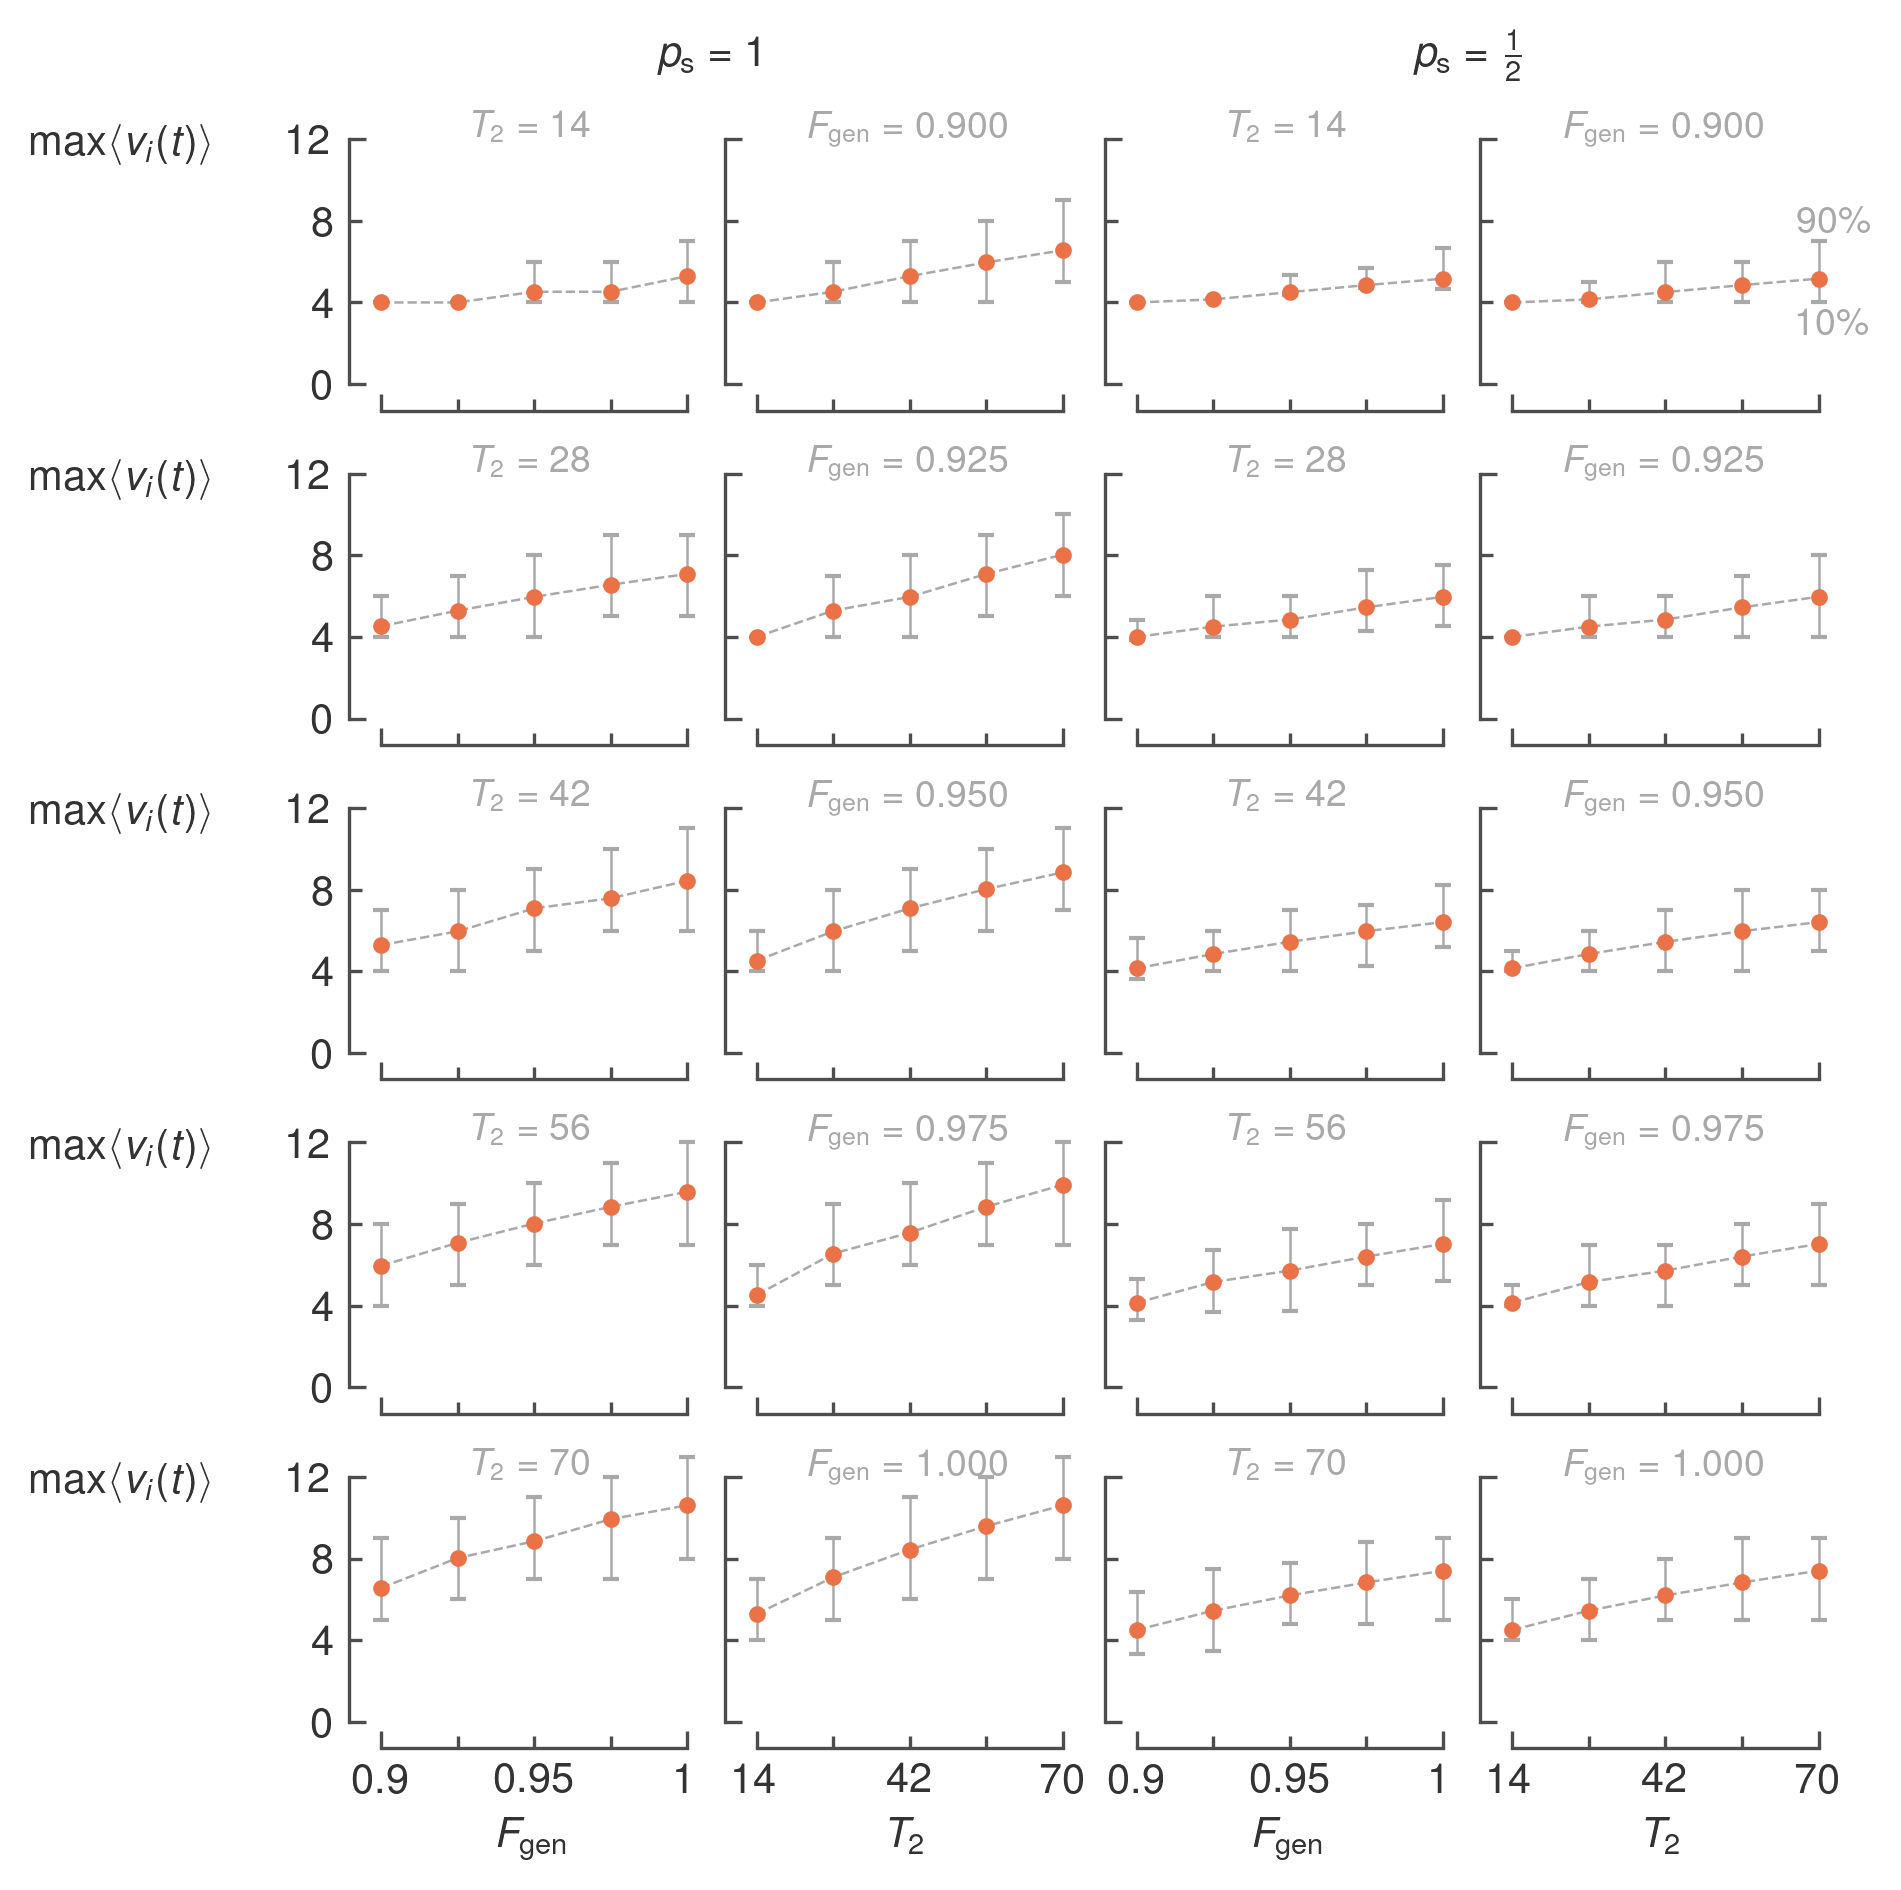

In [34]:
import matplotlib.pyplot as plt
plt.style.use('FOLDER_LOCATION/figure.mplstyle')
mm = 1/25.4
outward = 4
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
lightness_control_k = 0.42
lightness_control_V = 0.14
ratio = 1.25
color_plot = '#0098a1'

fig, ax = plt.subplots(5,4, constrained_layout=True, figsize=[(157.5)*mm, 157.5*mm], sharey='row')
colors = plt.cm.viridis(np.linspace(0, 0.9, 5))
colors2 = plt.cm.plasma(np.linspace(0, 0.9, 5))
y_max_v = 12


for i in range(5):
    ax[i, 0].errorbar(F_gen, np.array(V_max_array)[:, i], fmt='--', linewidth=0.6, yerr=[np.array(V_max_array)[:, i]-np.array(V_max_array_10pct)[:, i], np.array(V_max_array_90pct)[:, i]-np.array(V_max_array)[:, i]], color='darkgray', capsize=2, elinewidth=0.6, zorder=0)
    ax[i, 2].errorbar(F_gen, np.array(V_max_array_probswap)[i, :], fmt='--', linewidth=0.6, yerr=[np.array(V_max_array_probswap)[:, i]-np.array(V_max_array_probswap_10pct)[:, i], np.array(V_max_array_probswap_90pct)[:, i]-np.array(V_max_array_probswap)[:, i]], color='darkgray', capsize=2, elinewidth=0.6, zorder=0)
    ax[i, 0].plot(F_gen, np.array(V_max_array)[:, i], '.', color=color_virtual_neighbourhood_size)
    ax[i, 2].plot(F_gen, np.array(V_max_array_probswap)[i, :], '.', color=color_virtual_neighbourhood_size)

    ax[i, 0].spines['left'].set_position(('outward', outward))
    ax[i, 0].spines['left'].set_bounds(0, y_max_v)
    
    ax[i, 2].spines['left'].set_position(('outward', outward))
    ax[i, 2].spines['left'].set_bounds(0, y_max_v)
        
    ax[i, 0].set_yticks(ticks=[0, 12])
    ax[i, 0].set_yticks(ticks=[4, 8], minor=True)
    ax[i, 0].set_yticklabels(labels=[4, 8], minor=True, ha='right')  

    ax[i, 2].set_yticks(ticks=[0, 12])
    ax[i, 2].set_yticks(ticks=[4, 8], minor=True)
    ax[i, 2].set_yticklabels(labels=[4, 8], minor=True, ha='right')
    
    ax[i, 0].set_aspect(0.1/(y_max_v*ratio))
    ax[i, 2].set_aspect(0.1/(y_max_v*ratio))
    
    ax[i, 0].spines['bottom'].set_position(('outward', outward))
    ax[i, 0].spines['bottom'].set_bounds(0.9, 1)

    ax[i, 2].spines['bottom'].set_position(('outward', outward))
    ax[i, 2].spines['bottom'].set_bounds(0.9, 1)
    
    ax[i, 1].errorbar(T2, np.array(V_max_array)[i, :], fmt='--', linewidth=0.6, yerr=[np.array(V_max_array)[i, :]-np.array(V_max_array_10pct)[i, :], np.array(V_max_array_90pct)[i, :]-np.array(V_max_array)[i, :]], color='darkgray', capsize=2, elinewidth=0.6, zorder=0)
    ax[i, 3].errorbar(T2, np.array(V_max_array_probswap)[i, :], fmt='--', linewidth=0.6, yerr=[np.array(V_max_array_probswap)[i, :]-np.array(V_max_array_probswap_10pct)[i, :], np.array(V_max_array_probswap_90pct)[i, :]-np.array(V_max_array_probswap)[i, :]], color='darkgray', capsize=2, elinewidth=0.6, zorder=0)
    ax[i, 1].plot(T2, np.array(V_max_array)[i, :], '.', color=color_virtual_neighbourhood_size)
    ax[i, 3].plot(T2, np.array(V_max_array_probswap)[i, :], '.', color=color_virtual_neighbourhood_size)

    ax[i, 1].spines['left'].set_position(('outward', outward))
    ax[i, 1].spines['left'].set_bounds(0, y_max_v)
    
    ax[i, 3].spines['left'].set_position(('outward', outward))
    ax[i, 3].spines['left'].set_bounds(0, y_max_v)
        
    ax[i, 1].set_yticks(ticks=[0, 12])
    ax[i, 1].set_yticks(ticks=[4, 8], minor=True)
    ax[i, 1].set_yticklabels(labels=[4, 8], minor=True, ha='right')  

    ax[i, 3].set_yticks(ticks=[0, 12])
    ax[i, 3].set_yticks(ticks=[4, 8], minor=True)
    ax[i, 3].set_yticklabels(labels=[4, 8], minor=True, ha='right')
    
    ax[i, 1].set_aspect(56/(y_max_v*ratio))
    ax[i, 3].set_aspect(56/(y_max_v*ratio))
    
    ax[i, 1].spines['bottom'].set_position(('outward', outward))
    ax[i, 1].spines['bottom'].set_bounds(14, 70)

    ax[i, 3].spines['bottom'].set_position(('outward', outward))
    ax[i, 3].spines['bottom'].set_bounds(14, 70)
    
    
    ax[i, 0].set_ylim([0-0.04*y_max_v, y_max_v+0.1*y_max_v])
    ax[i, 1].set_ylim([0-0.04*y_max_v, y_max_v+0.1*y_max_v])
    ax[i, 2].set_ylim([0-0.04*y_max_v, y_max_v+0.1*y_max_v])
    ax[i, 3].set_ylim([0-0.04*y_max_v, y_max_v+0.1*y_max_v])
    
    ax[i, 0].set_ylabel(r'$\max \langle v_i(t) \rangle$', rotation=0, y=0.82, labelpad = 17.5, ha='right', color=color_text)
    ax[i, 1].set_title(r'$F_{\mathrm{gen}}=%1.3f$' %F_gen[i],y=0.83,fontsize=9, color='darkgray')
    ax[i, 3].set_title(r'$F_{\mathrm{gen}}=%1.3f$' %F_gen[i],y=0.83,fontsize=9, color='darkgray')
    
    ax[i, 0].set_title(r'$T_2=%i$' %T2[i],y=0.83,fontsize=9, color='darkgray')
    ax[i, 2].set_title(r'$T_2=%i$' %T2[i],y=0.83,fontsize=9, color='darkgray')
    
    ax[i, 0].set_xticks(ticks=[0.9, 1], minor=False)
    ax[i, 0].set_xticks(ticks=[0.925, 0.95, 0.975], minor=True)
    ax[i, 0].set_xticklabels([{}, {}], minor=False)

    ax[i, 2].set_xticks(ticks=[0.9, 1], minor=False)
    ax[i, 2].set_xticks(ticks=[0.925, 0.95, 0.975], minor=True)
    ax[i, 2].set_xticklabels([{}, {}], minor=False)

    ax[i, 1].set_xticks(ticks=[14, 70], minor=False)
    ax[i, 1].set_xticks(ticks=[28, 42, 56], minor=True)
    ax[i, 1].set_xticklabels([{}, {}], minor=False)

    ax[i, 3].set_xticks(ticks=[14, 70], minor=False)
    ax[i, 3].set_xticks(ticks=[28, 42, 56], minor=True)
    ax[i, 3].set_xticklabels([{}, {}], minor=False)


ax[4, 0].set_xticks(ticks=[0.9, 1], minor=False)
ax[4, 0].set_xticks(ticks=[0.925, 0.95, 0.975], minor=True)
ax[4, 0].set_xticklabels([0.9, 1], minor=False)
ax[4, 0].set_xticklabels([{}, 0.95, {}], minor=True)

ax[4, 2].set_xticks(ticks=[0.9, 1], minor=False)
ax[4, 2].set_xticks(ticks=[0.925, 0.95, 0.975], minor=True)
ax[4, 2].set_xticklabels([{}, 0.95, {}], minor=True)
ax[4, 2].set_xticklabels([0.9, 1], minor=False)

ax[4, 1].set_xticks(ticks=[14, 70], minor=False)
ax[4, 1].set_xticks(ticks=[28, 42, 56], minor=True)
ax[4, 1].set_xticklabels([{}, 42, {}], minor=True)
ax[4, 1].set_xticklabels([14, 70], minor=False)

ax[4, 3].set_xticks(ticks=[14, 70], minor=False)
ax[4, 3].set_xticks(ticks=[28, 42, 56], minor=True)
ax[4, 3].set_xticklabels([{}, 42, {}], minor=True)
ax[4, 3].set_xticklabels([14, 70], minor=False)

ax[4, 0].set_xlabel(r'$F_{\text{gen}}$')
ax[4, 1].set_xlabel(r'$T_2$')
ax[4, 2].set_xlabel(r'$F_{\text{gen}}$')
ax[4, 3].set_xlabel(r'$T_2$')

fig.suptitle(r'$p_{\mathrm{s}}=1 \qquad\qquad\qquad\qquad\qquad\qquad\qquad\quad\ \ p_{\mathrm{s}}=\frac{1}{2}$', x=0.5744, fontsize = 10, color=color_text)
ax[0, 3].text(66, 2.4, r'10\%', fontsize=9, color='darkgray')
ax[0, 3].text(66, 7.4, r'90\%', fontsize=9, color='darkgray')

# fig.savefig('FOLDER_LOCATION/sweep_max_V_tcut_square_distribution.pdf', bbox_inches = 'tight', pad_inches=0*mm)

In [41]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

color_virtual_neighbourhood_size = '#EB7246'
lightness_control_V = 0.1/2

colours = ListedColormap([adjust_lightness(color_virtual_neighbourhood_size, 1.6-lightness_control_V*i) for i in range(13)])

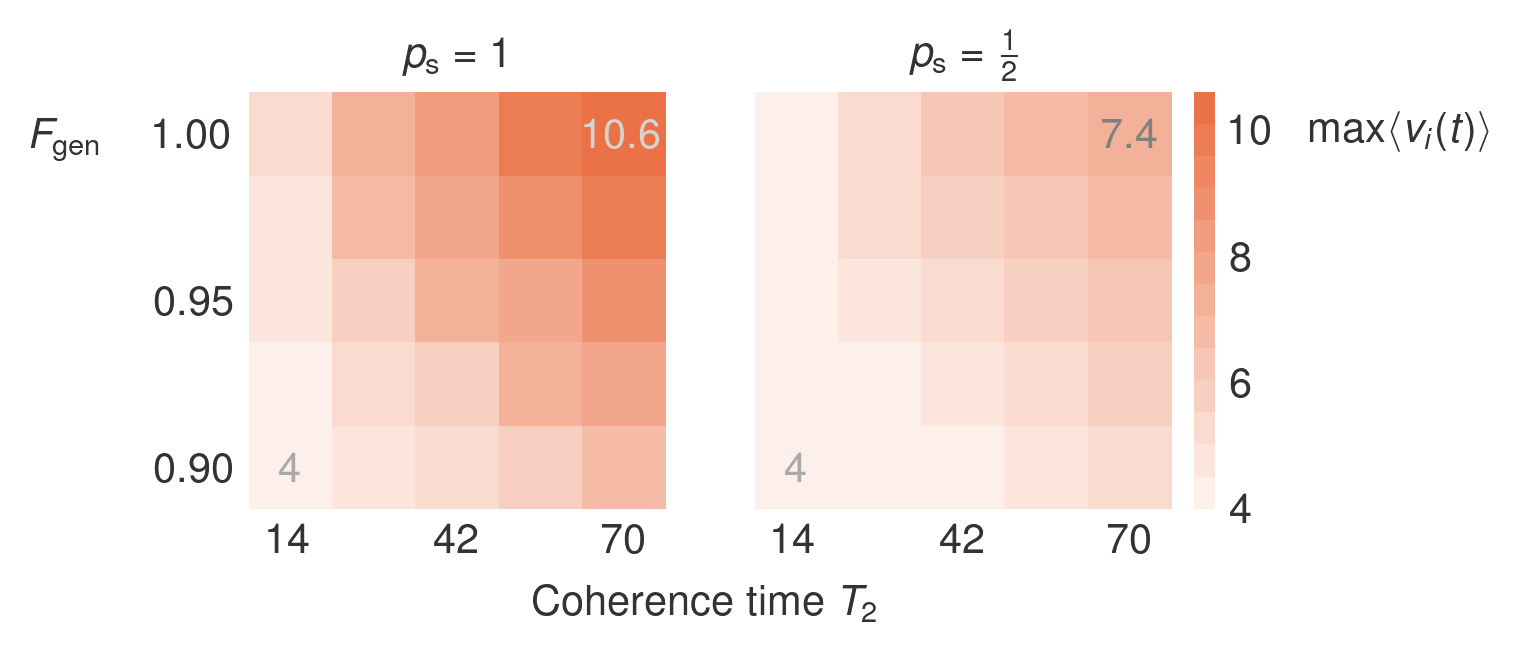

In [46]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')


mm = 1/25.4
outward = 2
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
ligthness_control_k = 0.45
lightness_control_V = 0.15

fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=[(157.5)*mm/5*4, 157.5*mm/3], sharex='col', sharey='row')

ax[0].pcolor(T2, F_gen, V_max_array, cmap = colours, vmin = 4, vmax = 10.6)

ax[0].tick_params(axis='both', which='both', direction='out', size = 0)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xticks([14, 42, 70])
ax[0].set_xticks([28, 56], minor=True)
ax[0].set_yticks([0.9, 0.95, 1])
ax[0].set_yticks([0.925, 0.975], minor=True)

ax[0].set_ylabel(r'$F_{\mathrm{gen}}$', rotation=0, y=0.835, labelpad = 12, ha='right')

ax[0].set_aspect(560)
ax[0].set_title(r'$p_{\mathrm{s}}=1$', color=color_text)

pcolor_plot = ax[1].pcolor(T2, F_gen, V_max_array_probswap, cmap = colours, vmin = 4, vmax = 10.6)

ax[1].tick_params(axis='both', which='both', direction='out', size = 0)

ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xticks([14, 42, 70])
ax[1].set_xticks([28, 56], minor=True)
ax[1].set_yticks([0.9, 0.95, 1])
ax[1].set_yticks([0.925, 0.975], minor=True)

ax[1].set_aspect(560)
ax[1].set_title(r'$p_{\mathrm{s}}=\frac{1}{2}$', color=color_text)

fig.supxlabel(r'Coherence time $T_2$', x=0.46,  color=color_text, fontsize=10)

cbar = fig.colorbar(pcolor_plot, drawedges=False, ticks = [4, 6, 8, 10])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0)
# cbar.set_label(r'$\max \langle |V_i(t)| \rangle$', labelpad=8, rotation=0, ha='left', y=0.955, color=color_text)
cbar.set_label(r'$\max \langle v_i(t) \rangle$', labelpad=8, rotation=0, ha='left', y=0.955, color=color_text)


ax[1].text(14, 0.9, r'4' , ha='center', va='center_baseline', color='darkgray', fontsize=10)
ax[1].text(70, 1, r'7.4' , ha='center', va='center_baseline', color='gray', fontsize=10)

ax[0].text(14, 0.9, r'4' , ha='center', va='center_baseline', color='darkgray', fontsize=10)
ax[0].text(70, 1, r'10.6' , ha='center', va='center_baseline', color='lightgray', fontsize=10)

# fig.savefig('FOLDER_LOCATION/Infinite networks/sweep_max_V_tcut_square.pdf', bbox_inches = 'tight', pad_inches=0*mm)

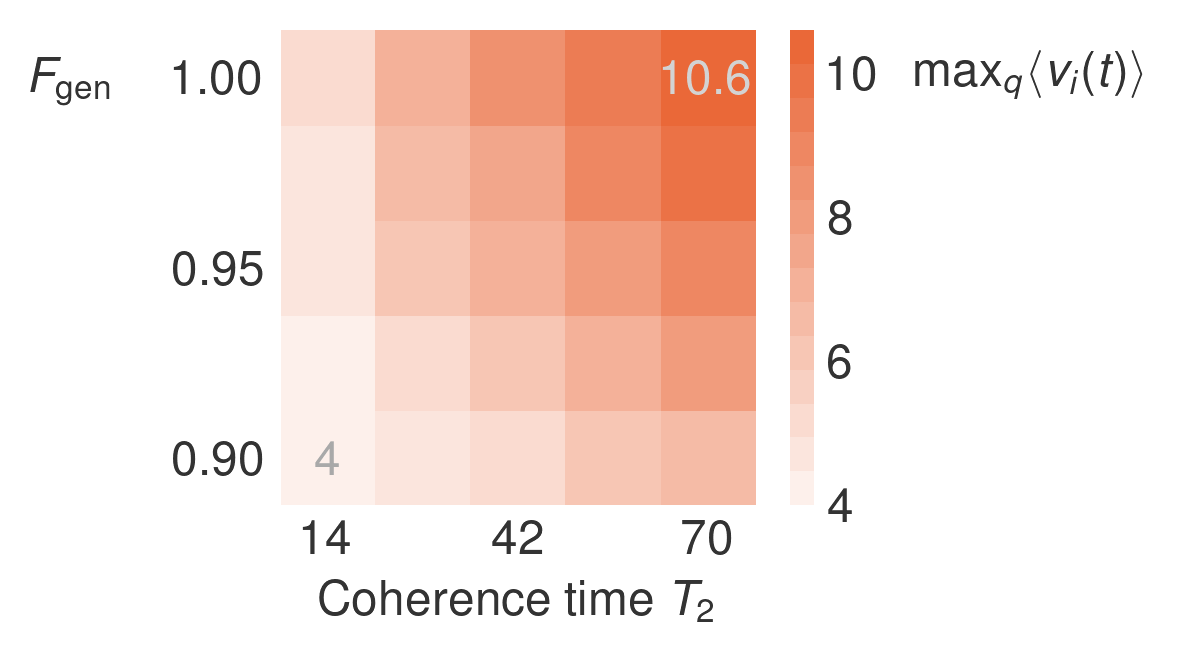

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')
fs=11.5

mm = 1/25.4
outward = 2
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
ligthness_control_k = 0.45
lightness_control_V = 0.15

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=[(157.5)*mm/5*3, 157.5*mm/3], sharex='col', sharey='row')

pcolor_plot = ax.pcolor(T2, F_gen, V_max_array, cmap = colours, vmin = 4, vmax = 10.6)

ax.tick_params(axis='both', which='both', direction='out', size = 0, labelsize=fs)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([14, 42, 70])
ax.set_xticks([28, 56], minor=True)
ax.set_yticks([0.9, 0.95, 1])
ax.set_yticks([0.925, 0.975], minor=True)

ax.set_ylabel(r'$F_{\mathrm{gen}}$', rotation=0, y=0.84, labelpad = 14, ha='right', fontsize=fs)

ax.set_aspect(560)

ax.set_xlabel(r'Coherence time $T_2$', x=0.5,  color=color_text, fontsize=fs)

cbar = fig.colorbar(pcolor_plot, drawedges=False, ticks = [4, 6, 8, 10])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0, labelsize=fs)
# cbar.set_label(r'$\max \langle |V_i(t)| \rangle$', labelpad=8, rotation=0, ha='left', y=0.945, color=color_text)
cbar.set_label(r'$\max_q \langle v_i(t) \rangle$', labelpad=8, rotation=0, ha='left', y=0.96, color=color_text, fontsize=fs)


ax.text(14, 0.9, r'4' , ha='center', va='center_baseline', color='darkgray', fontsize=fs)
ax.text(70, 1, r'10.6' , ha='center', va='center_baseline', color='lightgray', fontsize=fs)
# fig.savefig('FOLDER_LOCATION/2023-01-12 - Final presentation/Figures/sweep_max_V_tcut_square.png', bbox_inches = 'tight', pad_inches=0*mm, dpi=600)

In [45]:
t_cut_array = np.array([[0, 1, 2, 3, 4],
                           [0, 2, 3, 5, 7],
                           [1, 3, 5, 7, 9],
                           [1, 4, 6, 9, 12],
                           [2, 5, 8, 11, 14]
                          ])+1

In [44]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

color_virtual_neighbourhood_size = '#0098a1'
lightness_control_V = 0.18

colours_tcut = ListedColormap([adjust_lightness(color_virtual_neighbourhood_size, 3.2-lightness_control_V*i) for i in range(16)])

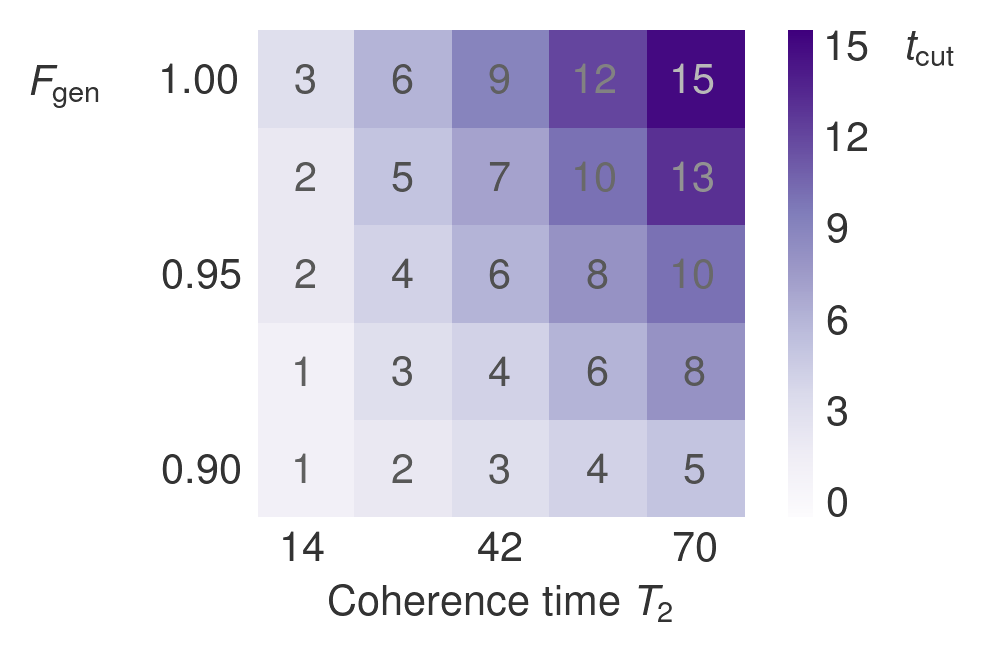

In [94]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('FOLDER_LOCATION/figure.mplstyle')


mm = 1/25.4
outward = 2
color_virtual_node_degree = '#0066A2'
color_virtual_neighbourhood_size = '#EB7246'
color_text = (0, 0, 0, 0.8)
ligthness_control_k = 0.45
lightness_control_V = 0.15

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=[(157.5)*mm/5*3, 157.5*mm/3], sharex='col', sharey='row')

pcolor_plot = ax.pcolor(T2, F_gen, t_cut_array, cmap = 'Purples', vmin = -0.5, vmax = 15.5)

ax.tick_params(axis='both', which='both', direction='out', size = 0)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([14, 42, 70])
ax.set_xticks([28, 56], minor=True)
ax.set_yticks([0.9, 0.95, 1])
ax.set_yticks([0.925, 0.975], minor=True)

ax.set_ylabel(r'$F_{\mathrm{gen}}$', rotation=0, y=0.84, labelpad = 14, ha='right')

ax.set_aspect(560)

ax.set_xlabel(r'Coherence time $T_2$', x=0.5,  color=color_text, fontsize=10)

cbar = fig.colorbar(pcolor_plot, drawedges=False, ticks = [0, 3, 6, 9, 12, 15])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0)
cbar.set_label(r'$ t_{\mathrm{cut}} $', labelpad=8, rotation=0, ha='left', y=1.0, color=color_text)

for i in range(5):
    for j in range(5):
        ax.text(T2[i], F_gen[j], t_cut_array[j, i], ha='center', va='center_baseline', color=adjust_lightness('dimgray', 1-t_cut_array[j, i]*0.1+(t_cut_array[j, i]*0.1)**2), fontsize=10)
# fig.savefig('FOLDER_LOCATION/sweep_max_V_tcut_square_tcut.pdf', bbox_inches = 'tight', pad_inches=0*mm)